In [1]:
import numpy as np
import astropy.io.fits as fits 
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import stats
import random
from scipy.optimize import leastsq

In [2]:
hdu = fits.open('HE0232-0900.wo_absorption.fits')
#hdu.info()
qso_data = hdu[0].data
qso_error = hdu[1].data
qso_header = hdu[0].header
wavestart = qso_header['CRVAL3']
wavint = qso_header['CD3_3']
#wave = wavestart+np.arange(qso_data.shape[0])*wavint. This is the same as the one below. 
[central_x,central_y]= [67,51]#

In [3]:
z = 0.043143
k = 1+z

In [20]:
wave = np.arange(wavestart,(wavestart+(wavint*qso_data.shape[0])),wavint)#start,stop,step
select =(wave>6370*k)&(wave<6790*k)
x = wave
y = qso_data[:,51,67]
y_err = qso_error[:,51,67][select]

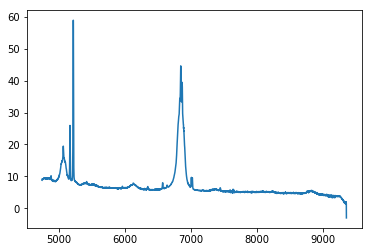

In [21]:
plt.plot(x,y)
plt.show()

In [6]:
#If we doublet, they're coupled(the velocity and velocity dispersion).
#SII has blue wings. NII as well. 
#H-alpha has higher veloicty dispersion than the others. The velocity dispersion gives you the line shape. 

In [19]:
6548*k

6830.5003639999995

In [7]:
from profile_fitting_HE0232_0900_SII import *

In [8]:
#x0=[2,12942,10,23,12942,10,10,12942,10,15,12742,10,5,5,12942,10,12,12,12742,12,1,1]
x0=[8,12942,10,20,12942,20,5,12942,3,9.99,12742,4,5,5,12942,15,10,10,12742,10,5,5]
popt,pcov = leastsq(full_gauss3,x0,args = (x,y,y_err),maxfev=10000000)
print(popt)
[amp_Ha,vel_Ha,vel_sigma_Ha,amp_NI,vel_NI,vel_sigma_NI,amp_N6583,vel_N6583,vel_N6583_sigma,amp_N6583_br,vel_N6583_br,vel_N6583_sigma_br,amp_S6716,amp_S6731,vel_S6716,vel_S6716_sigma,amp_S6716_br,amp_S6731_br,vel_S6716_br,vel_S6716_sigma_br,m,c] = popt

[  1.08530865e+01   1.29027041e+04   1.48475103e+02   3.84103851e+00
   1.26323111e+04   5.74651368e+02   1.81772109e+01   1.26263413e+04
   1.52272914e+03   8.39081614e+00   1.29496785e+04   1.28866606e+02
   3.39832895e+00   3.37488578e+00   1.29366322e+04   1.64503055e+02
   4.99188632e+00   1.67213345e+00   5.03966805e+03  -3.31365310e+03
  -1.34045077e+00   1.52630505e+01]


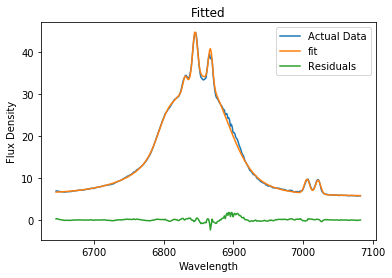

In [9]:
plt.plot(x,y,label='Actual Data')
fit = full_gauss3(popt,x,y,y_err)*(y_err)+y
plt.plot(x,fit,label='fit')
residual = y - fit
plt.plot(x,residual,label='Residuals')
plt.title('Fitted')
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.legend()
plt.show()

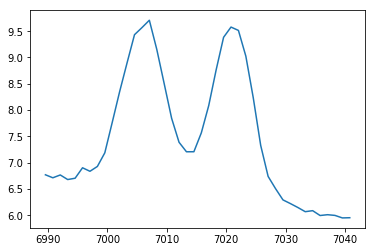

In [10]:
select2 =(wave>6700*k)&(wave<6750*k)
x2 = wave[select2]
y2 = qso_data[:,51,67][select2]
y_err2 = qso_error[:,51,67][select2]
plt.plot(x2,y2)
plt.show()

In [11]:
#x0=[2,12942,10,23,12942,10,10,12942,10,15,12742,10,5,5,12942,10,12,12,12742,12,1,1]
x0=[8,12942,10,20,12942,20,5,12942,3,9.99,12742,4,5,5,12942,15,10,10,12742,10,5,5]
popt2,pcov2 = leastsq(full_gauss3,x0,args = (x2,y2,y_err2),maxfev=10000000)
print(popt2)
[amp_Ha,vel_Ha,vel_sigma_Ha,amp_NI,vel_NI,vel_sigma_NI,amp_N6583,vel_N6583,vel_N6583_sigma,amp_N6583_br,vel_N6583_br,vel_N6583_sigma_br,amp_S6716,amp_S6731,vel_S6716,vel_S6716_sigma,amp_S6716_br,amp_S6731_br,vel_S6716_br,vel_S6716_sigma_br,m,c] = popt2

[  8.00000000e+00   1.29420000e+04   1.00000000e+01   2.00000000e+01
   1.29420000e+04   2.00000000e+01   5.00000000e+00   1.29420000e+04
   3.00000000e+00   9.99000000e+00   1.27420000e+04   4.00000000e+00
   1.55162805e+00   3.34914689e+00   1.29263228e+04   1.40769466e+02
  -1.68114548e-01   1.61240371e+00   1.23014133e+04   1.57909004e+02
  -1.93324025e+01   1.42057223e+02]


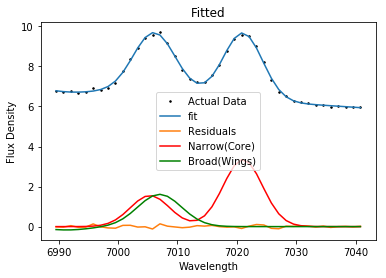

In [22]:
plt.plot(x2,y2,'ko',markersize=1.5,label='Actual Data')
fit2 = full_gauss3(popt2,x2,y2,y_err2)*(y_err2)+y2
plt.plot(x2,fit2,label='fit')
residual2 = y2 - fit2
plt.plot(x2,residual2,label='Residuals')

plt.plot(x2,SII_doublet_gauss(x2,amp_S6716,amp_S6731,vel_S6716,vel_S6716_sigma),'-r',label = 'Narrow(Core)')
plt.plot(x2,SII_doublet_gauss(x2,amp_S6716_br,amp_S6731_br,vel_S6716_br,vel_S6716_sigma_br),'-g',label='Broad(Wings)')
#plt.plot(x2,NI_gauss(x2,popt2[3],popt2[4],popt2[5]),'-y',label='NI')
#plt.plot(x2,Ha_gauss(x2,amp_Ha,vel_Ha,vel_sigma_Ha),'-m',label='Ha')
#plt.plot(x2,NII_doublet_gauss(x2,amp_N6583,vel_N6583,vel_N6583_sigma),'-b',label='NII6583')
#plt.plot(x2,NII_doublet_gauss(x2,amp_N6583_br,vel_N6583_br,vel_N6583_sigma_br),'-c',label='NII6583_br')

plt.title('Fitted')
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.legend()
plt.show()

In [13]:
print(stats.ks_2samp(y2,fit2))

Ks_2sampResult(statistic=0.071428571428571397, pvalue=0.99985207560317191)
